

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-04-27 03:37:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-04-27 03:37:56 (18.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
import pandas

In [4]:
train_dataset=pandas.read_csv("loan_train.csv")
train_dataset.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
print(train_dataset.shape)
train_dataset.info()
train_dataset.describe()

(346, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


# Data Visualization


In [6]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


In [7]:
import seaborn
import numpy
from matplotlib import pyplot

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

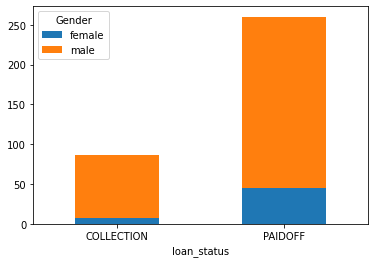

In [8]:
print(train_dataset.groupby("Gender")["loan_status"].value_counts())
plot = train_dataset.groupby(['Gender', 'loan_status']).size().reset_index().pivot(columns='Gender', index='loan_status', values=0)

plot.plot(kind="bar", stacked=True)
pyplot.xticks(rotation=0)

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64


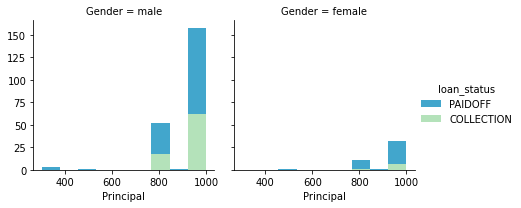

In [9]:
print(train_dataset["Principal"].value_counts())
bins=numpy.linspace(train_dataset["Principal"].min(), train_dataset["Principal"].max(), 10)
plot=seaborn.FacetGrid(data=train_dataset, col="Gender", hue="loan_status", palette="GnBu_r", col_wrap=2)
plot.map(pyplot.hist, 'Principal', bins=bins)
plot.add_legend()

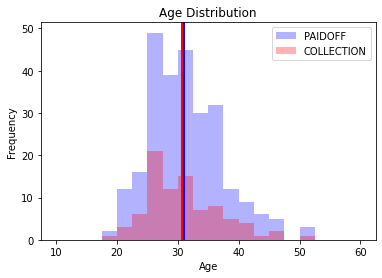

In [10]:
Paidoff=pandas.DataFrame([],columns=['Age'])
Paidoff['Age']=train_dataset[(train_dataset['loan_status']=='PAIDOFF')]['age']

Collection=pandas.DataFrame([],columns=['Age'])
Collection['Age']=train_dataset[(train_dataset['loan_status']=='COLLECTION')]['age']
Collection

Paidoff['Age'].plot(kind='hist',bins=20,range=(10,60),alpha=0.3,color='blue')
Collection['Age'].plot(kind='hist',bins=20,range=(10,60),alpha=0.3,color='red')

pyplot.title('Age Distribution')
pyplot.legend(["PAIDOFF","COLLECTION"])
pyplot.xlabel("Age")

pyplot.axvline(Paidoff['Age'].mean(), color='blue', linewidth=2)
pyplot.axvline(Collection['Age'].mean(),color='red', linewidth=2)

From the age analysis we can say that on the average of the age 30 people are collecting and paying back the loan

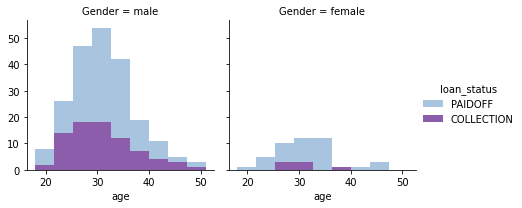

In [11]:
#print(train_dataset["age"].value_counts())
bins=numpy.linspace(train_dataset["age"].min(), train_dataset["age"].max(), 10)
plot=seaborn.FacetGrid(data=train_dataset, col="Gender", hue="loan_status", palette="BuPu", col_wrap=2)
plot.map(pyplot.hist, 'age', bins=bins)
plot.add_legend()

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male  
   month_of_year_effective_date  month_of_year_due_date  \
0                             9                      10   
1                             9                      10   
2                             9                       9   
3      

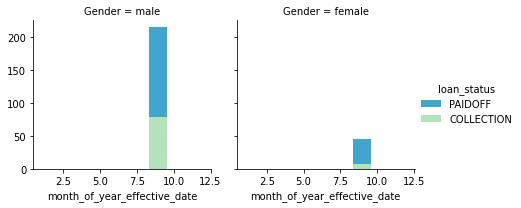

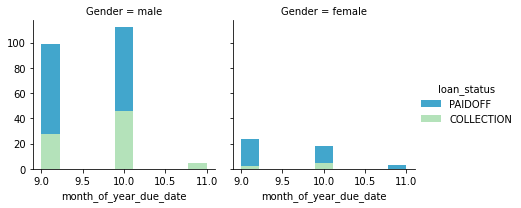

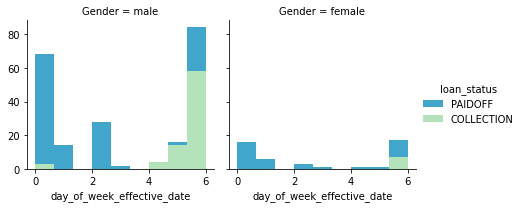

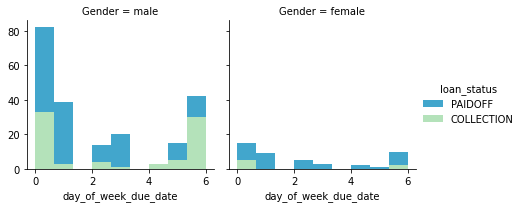

In [12]:
train_dataset["effective_date"]=pandas.to_datetime(train_dataset["effective_date"])
train_dataset["due_date"]=pandas.to_datetime(train_dataset["due_date"])

print(train_dataset.head())


# Creating a new dataframe to store the effective_date and due_date in the form of which day of the week members are paying their loan

columns=["month_of_year_effective_date","month_of_year_due_date","day_of_week_effective_date","day_of_week_due_date","Gender","loan_status"]
loan_dates=pandas.DataFrame(columns=columns)

loan_dates["month_of_year_effective_date"]=train_dataset["effective_date"].dt.month
loan_dates["month_of_year_due_date"]=train_dataset["due_date"].dt.month
loan_dates['day_of_week_effective_date']=train_dataset['effective_date'].dt.dayofweek
loan_dates['day_of_week_due_date']=train_dataset['due_date'].dt.dayofweek
loan_dates['loan_status']=train_dataset["loan_status"]
loan_dates['Gender']=train_dataset["Gender"]

print(loan_dates.head())

# Month of the year for effective date visualization
bins=numpy.linspace(1, 12, 10)
#bins=numpy.linspace(loan_dates["month_of_year_effective_date"].min(), loan_dates["month_of_year_effective_date"].max(), 10)
plot=seaborn.FacetGrid(data=loan_dates, col="Gender", hue="loan_status", palette="GnBu_r", col_wrap=2)
plot.map(pyplot.hist, 'month_of_year_effective_date', bins=bins)
plot.add_legend()

# Month of the year for due date visualization
bins=numpy.linspace(loan_dates["month_of_year_due_date"].min(), loan_dates["month_of_year_due_date"].max(), 10)
plot=seaborn.FacetGrid(data=loan_dates, col="Gender", hue="loan_status", palette="GnBu_r", col_wrap=2)
plot.map(pyplot.hist, 'month_of_year_due_date', bins=bins)
plot.add_legend()

# Day of the week for effective date visualization
bins=numpy.linspace(loan_dates["day_of_week_effective_date"].min(), loan_dates["day_of_week_effective_date"].max(), 10)
plot=seaborn.FacetGrid(data=loan_dates, col="Gender", hue="loan_status", palette="GnBu_r", col_wrap=2)
plot.map(pyplot.hist, 'day_of_week_effective_date', bins=bins)
plot.add_legend()

# Day of the week for due date visualization
bins=numpy.linspace(loan_dates["day_of_week_due_date"].min(), loan_dates["day_of_week_due_date"].max(), 10)
plot=seaborn.FacetGrid(data=loan_dates, col="Gender", hue="loan_status", palette="GnBu_r", col_wrap=2)
plot.map(pyplot.hist, 'day_of_week_due_date', bins=bins)
plot.add_legend()

# Feature Selection & Extraction


From the above features visulization and analysis

Most of the colection and paidoff for both male and female are done for the


In [13]:
final_train_target=pandas.DataFrame(train_dataset["loan_status"])
final_train_features=train_dataset[["Principal", "terms",	"age",	"education",	"Gender"]]

features_to_be_added=loan_dates.drop(labels=["month_of_year_effective_date", "Gender", "loan_status"], axis=1)
final_train_features=pandas.concat([final_train_features, features_to_be_added], axis="columns")

final_train_features.head()

,Principal,terms,age,education,Gender,month_of_year_due_date,day_of_week_effective_date,day_of_week_due_date
0,1000,30,45,High School or Below,male,10,3,4
1,1000,30,33,Bechalor,female,10,3,4
2,1000,15,27,college,male,9,3,3
3,1000,30,28,college,female,10,4,5
4,1000,30,29,college,male,10,4,5


Convert the categorical feature "Gender" into binary value

In [14]:
final_train_features.replace(to_replace=['male','female'], value=[0,1], inplace=True)
final_train_features.head()

,Principal,terms,age,education,Gender,month_of_year_due_date,day_of_week_effective_date,day_of_week_due_date
0,1000,30,45,High School or Below,0,10,3,4
1,1000,30,33,Bechalor,1,10,3,4
2,1000,15,27,college,0,9,3,3
3,1000,30,28,college,1,10,4,5
4,1000,30,29,college,0,10,4,5


One Hot encoding on the categorical data "education"


In [15]:
education_encoding_data=pandas.get_dummies(final_train_features["education"])
education_encoding_data.head()

# adding the one hot encoded information into final training features
final_train_features=pandas.concat([final_train_features,education_encoding_data], axis="columns")

# dropping the "education" field 
final_train_features.drop(labels=["education"], axis=1, inplace=True)
final_train_features.head()

,Principal,terms,age,Gender,month_of_year_due_date,day_of_week_effective_date,day_of_week_due_date,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,10,3,4,0,1,0,0
1,1000,30,33,1,10,3,4,1,0,0,0
2,1000,15,27,0,9,3,3,0,0,0,1
3,1000,30,28,1,10,4,5,0,0,0,1
4,1000,30,29,0,10,4,5,0,0,0,1


# Data Normalization

In [16]:
from sklearn import preprocessing
normalizer=preprocessing.StandardScaler()

In [17]:
normalized_train_features=normalizer.fit(final_train_features).transform(final_train_features)
normalized_train_features

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

The loan data is loaded and processed. The required features from the loan data is selected and extracted.

Split the Loan data set in two parts as training and testing data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(normalized_train_features,final_train_target,test_size=0.2,random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 11) (276, 1)
Test set: (70, 11) (70, 1)


In [20]:
# Method to create Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = numpy.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=45)
    pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.6142857142857143, 0.6571428571428571, 0.6857142857142857, 0.6857142857142857, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7285714285714285, 0.7428571428571429, 0.7428571428571429, 0.7142857142857143, 0.7428571428571429, 0.7142857142857143, 0.7285714285714285, 0.7142857142857143, 0.7, 0.7]


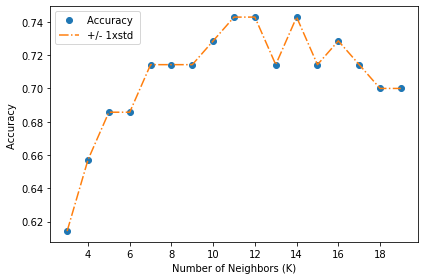

From the above graph the KNN model is giving the best accuracy for 11 number of neighbors


In [36]:
from sklearn.neighbors import KNeighborsClassifier

mean_acc=[]
std_acc=[]

best_accuracy=0
Ks=20   #Ks is the upper bound of number of neighbors 

for neighbor in range(3,Ks,1):
  KNN_classifier=KNeighborsClassifier(n_neighbors=neighbor)
  KNN_classifier.fit(X=X_train, y=y_train)
  KNN_prediction=KNN_classifier.predict(X_test)
  mean_acc.append(accuracy_score(y_test,KNN_prediction))

  if best_accuracy<accuracy_score(y_test,KNN_prediction) :
    best_accuracy=accuracy_score(y_test,KNN_prediction)
    selected_neighbor=neighbor
  #std_acc.append(numpy.std(test_actual_target==KNN_prediction)/numpy.sqrt(KNN_prediction.shape[0]))

print(mean_acc)

mean_acc=numpy.array(mean_acc)
pyplot.plot(range(3,Ks,1), mean_acc, 'o')
pyplot.plot(range(3,Ks,1), mean_acc, '-.')
#pyplot.fill_between(range(3,Ks,2),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
#pyplot.fill_between(range(3,Ks,2),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
pyplot.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
pyplot.ylabel('Accuracy ')
pyplot.xlabel('Number of Neighbors (K)')
pyplot.tight_layout()
pyplot.show()

print("From the above graph the KNN model is giving the best accuracy for", selected_neighbor, "number of neighbors")

In [37]:
KNN_classifier=KNeighborsClassifier(n_neighbors=selected_neighbor)
KNN_classifier.fit(X=X_train, y=y_train)
KNN_prediction=KNN_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix, without normalization
[[ 4 17]
 [ 1 48]]


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

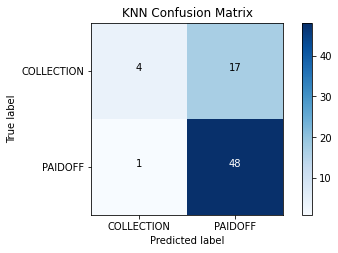

In [38]:
cm=confusion_matrix(y_true=y_test, y_pred=KNN_prediction)
classes=["COLLECTION","PAIDOFF"]
plot_confusion_matrix(cm=cm, classes=classes, title="KNN Confusion Matrix")
pyplot.xticks(rotation=0)

# Decision Tree


In [39]:
from sklearn.tree import DecisionTreeClassifier

DT_classifier=DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT_classifier.fit(X=X_train, y=y_train)

DT_prediction=DT_classifier.predict(X_test)

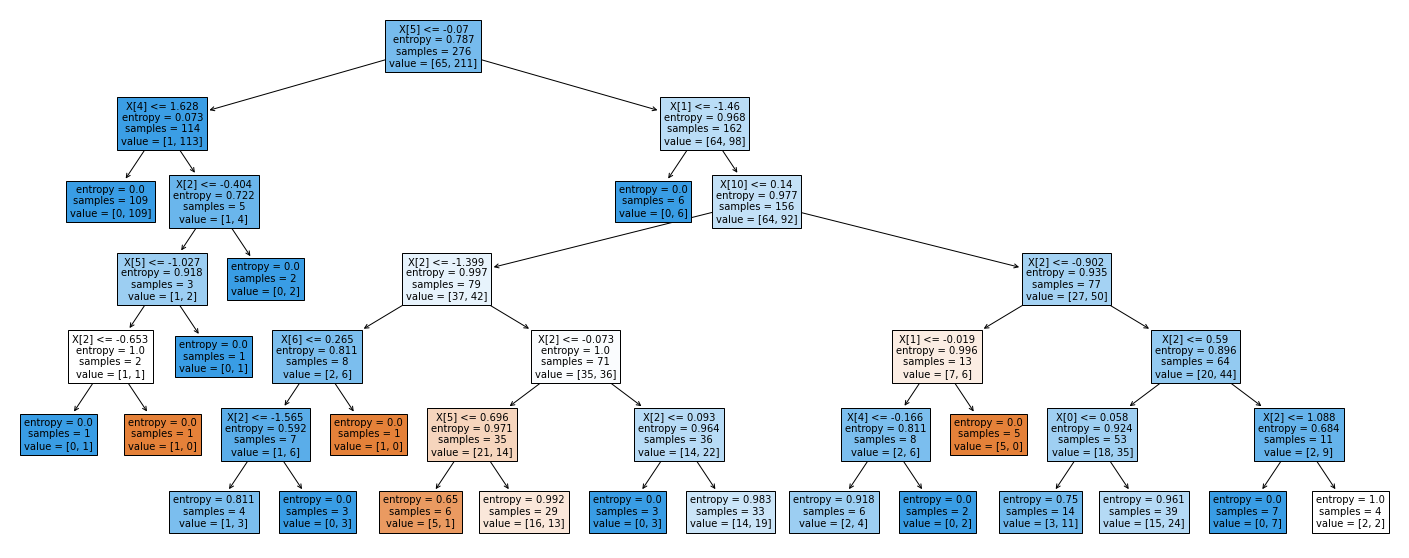

In [40]:
import sklearn
pyplot.figure(figsize=(25,10))
sklearn.tree.plot_tree(DT_classifier, fontsize=10, filled=True)
pyplot.show()

Confusion matrix, without normalization
[[ 6 15]
 [ 7 42]]


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

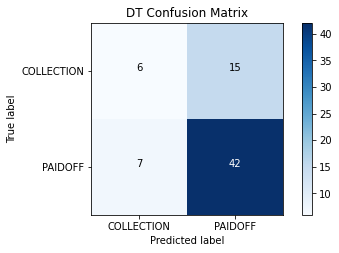

In [41]:
cm=confusion_matrix(y_true=y_test, y_pred=DT_prediction)
classes=["COLLECTION","PAIDOFF"]
plot_confusion_matrix(cm=cm, classes=classes, title="DT Confusion Matrix")
pyplot.xticks(rotation=0)

# Support Vector Machine


In [42]:
from sklearn import svm

svm_classifier=svm.SVC(kernel='rbf')
svm_classifier.fit(X=X_train, y=y_train)

svm_prediction=svm_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[ 1 20]
 [ 0 49]]


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

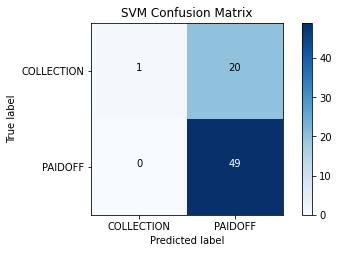

In [43]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_true=y_test, y_pred=svm_prediction)
classes=["COLLECTION","PAIDOFF"]
plot_confusion_matrix(cm=cm, classes=classes, title="SVM Confusion Matrix")
pyplot.xticks(rotation=0)

# Logistic Regression


In [44]:
from sklearn.linear_model import LogisticRegression

LR_classifier=LogisticRegression(C=0.01, solver='liblinear')
LR_classifier.fit(X=X_train, y=y_train)

LR_prediction=LR_classifier.predict(X_test)
LR_prediction_prob=LR_classifier.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[ 1 20]
 [ 1 48]]


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

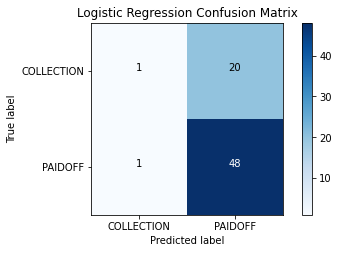

In [45]:
cm=confusion_matrix(y_true=y_test, y_pred=LR_prediction)
classes=["COLLECTION","PAIDOFF"]
plot_confusion_matrix(cm=cm, classes=classes, title="Logistic Regression Confusion Matrix")
pyplot.xticks(rotation=0)

# Model Evaluation using Test set


In [46]:
from sklearn.metrics import jaccard_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [47]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-04-27 03:56:17--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-04-27 03:56:17 (944 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [48]:
test_dataset = pd.read_csv('loan_test.csv')
test_dataset.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [49]:
test_actual_target=pandas.DataFrame(test_dataset["loan_status"])
final_test_features=test_dataset[["Principal", "terms",	"age",	"education",	"Gender"]]

print(final_test_features.head())

   Principal  terms  age             education  Gender
0       1000     30   50              Bechalor  female
1        300      7   35       Master or Above    male
2       1000     30   43  High School or Below  female
3       1000     30   26               college    male
4        800     15   29              Bechalor    male


In [50]:
test_dataset["effective_date"]=pandas.to_datetime(test_dataset["effective_date"])
test_dataset["due_date"]=pandas.to_datetime(test_dataset["due_date"])

#print(test_dataset.head())

final_test_features["month_of_year_due_date"]=test_dataset["due_date"].dt.month
final_test_features['day_of_week_effective_date']=test_dataset['effective_date'].dt.dayofweek
final_test_features['day_of_week_due_date']=test_dataset['due_date'].dt.dayofweek

print(final_test_features.head())

   Principal  terms  age             education  Gender  \
0       1000     30   50              Bechalor  female   
1        300      7   35       Master or Above    male   
2       1000     30   43  High School or Below  female   
3       1000     30   26               college    male   
4        800     15   29              Bechalor    male   

   month_of_year_due_date  day_of_week_effective_date  day_of_week_due_date  
0                      10                           3                     4  
1                       9                           4                     3  
2                      10                           5                     6  
3                      10                           5                     6  
4                       9                           6                     6  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [51]:
final_test_features.replace(to_replace=["male","female"], value=[0,1], inplace=True)

education_encoding_data=pandas.get_dummies(final_test_features["education"])
education_encoding_data.head()

# adding the one hot encoded information into final training features
final_test_features=pandas.concat([final_test_features,education_encoding_data], axis="columns")

# dropping the "education" field 
final_test_features.drop(labels=["education"], axis=1, inplace=True)
final_test_features.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Principal,terms,age,Gender,month_of_year_due_date,day_of_week_effective_date,day_of_week_due_date,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,10,3,4,1,0,0,0
1,300,7,35,0,9,4,3,0,0,1,0
2,1000,30,43,1,10,5,6,0,1,0,0
3,1000,30,26,0,10,5,6,0,0,0,1
4,800,15,29,0,9,6,6,1,0,0,0


In [52]:
normalized_test_features=normalizer.fit(final_test_features).transform(final_test_features)

In [53]:
columns=['Algorithm', 'Precision', 'Recall', 'F1-Score', 'Jaccard-Index', 'Logloss']
report=pandas.DataFrame([],columns=columns)

algorithm=["k-Nearest Neighbour", "Decision Tree", "Support Vector Machine", "Logistic Regression"]

report['Algorithm']=algorithm
report

,Algorithm,Precision,Recall,F1-Score,Jaccard-Index,Logloss
0,k-Nearest Neighbour,NaN,NaN,NaN,NaN,NaN
1,Decision Tree,NaN,NaN,NaN,NaN,NaN
2,Support Vector Machine,NaN,NaN,NaN,NaN,NaN
3,Logistic Regression,NaN,NaN,NaN,NaN,NaN


In [54]:
KNN_prediction=KNN_classifier.predict(normalized_test_features)

report.loc[0]['Precision']=precision_score(test_actual_target, KNN_prediction, average='macro')
report.loc[0]['Recall']=recall_score(test_actual_target, KNN_prediction, average='macro')
report.loc[0]['F1-Score']=f1_score(test_actual_target, KNN_prediction, average='weighted')
report.loc[0]['Jaccard-Index']=jaccard_score(test_actual_target, KNN_prediction, pos_label='PAIDOFF')
report.loc[0]

Algorithm        k-Nearest Neighbour
Precision                   0.367925
Recall                        0.4875
F1-Score                    0.621266
Jaccard-Index               0.722222
Logloss                          NaN
Name: 0, dtype: object

In [55]:
DT_prediction=DT_classifier.predict(normalized_test_features)

report.loc[1]['Precision']=precision_score(test_actual_target, DT_prediction, average='macro')
report.loc[1]['Recall']=recall_score(test_actual_target, DT_prediction, average='macro')
report.loc[1]['F1-Score']=f1_score(test_actual_target, DT_prediction, average='weighted')
report.loc[1]['Jaccard-Index']=jaccard_score(test_actual_target, DT_prediction, pos_label='PAIDOFF')
report.loc[1]

Algorithm        Decision Tree
Precision             0.633208
Recall                0.626786
F1-Score              0.718793
Jaccard-Index           0.6875
Logloss                    NaN
Name: 1, dtype: object

In [56]:
svm_prediction=svm_classifier.predict(normalized_test_features)

report.loc[2]['Precision']=precision_score(test_actual_target, svm_prediction, average='macro')
report.loc[2]['Recall']=recall_score(test_actual_target, svm_prediction, average='macro')
report.loc[2]['F1-Score']=f1_score(test_actual_target, svm_prediction, average='weighted')
report.loc[2]['Jaccard-Index']=jaccard_score(test_actual_target, svm_prediction, pos_label='PAIDOFF')
report.loc[2]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Algorithm        Support Vector Machine
Precision                       0.37037
Recall                              0.5
F1-Score                       0.630418
Jaccard-Index                  0.740741
Logloss                             NaN
Name: 2, dtype: object

In [57]:
LR_prediction=LR_classifier.predict(normalized_test_features)
LR_prediction_prob=LR_classifier.predict_proba(normalized_test_features)

report.loc[3]['Precision']=precision_score(test_actual_target, LR_prediction, average='macro')
report.loc[3]['Recall']=recall_score(test_actual_target, LR_prediction, average='macro')
report.loc[3]['F1-Score']=f1_score(test_actual_target, LR_prediction, average='weighted')
report.loc[3]['Jaccard-Index']=jaccard_score(test_actual_target, LR_prediction, pos_label='PAIDOFF')
report.loc[3]['Logloss']=log_loss(test_actual_target, LR_prediction_prob)
report.loc[3]

Algorithm        Logistic Regression
Precision                   0.877358
Recall                      0.535714
F1-Score                    0.671764
Jaccard-Index               0.754717
Logloss                      0.57657
Name: 3, dtype: object

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [58]:
report

,Algorithm,Precision,Recall,F1-Score,Jaccard-Index,Logloss
0,k-Nearest Neighbour,0.367925,0.4875,0.621266,0.722222,NaN
1,Decision Tree,0.633208,0.626786,0.718793,0.6875,NaN
2,Support Vector Machine,0.37037,0.5,0.630418,0.740741,NaN
3,Logistic Regression,0.877358,0.535714,0.671764,0.754717,0.57657
